冯汇然, 12231095, Assignment 03, Due: 11/22 19:00

# 1. Niño 3.4 index
The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (`5N-5S`, `170W-120W`). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed `+/- 0.5°C` for a period of `5` months or more. Check [Equatorial Pacific Sea Surface Temperatures](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/) for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from [NOAA](https://www.noaa.gov/). Download the `netCDF4` file (`NOAA_NCDC_ERSST_v3b_SST.nc`) [here](http://172.18.31.60/index.php/s/do68CdKJbscS6QD).

**1.1 [10 points]** Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

**1.2 [10 points]** Visualize the computed Niño 3.4. Your plot should look similar to [this one](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-5-pg.gif_.).

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Date Processing

# ANS. 1.1

In [2]:
# Open a netCDF4 file
nino = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine='netcdf4')

# Select nino 3.4 area
nino34 = nino.sel(lat=slice(-5, 5), lon=slice(190, 240))

nino34

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
# Monthly climatology SST
sst_clim = nino34.sst.mean(['lat','lon']).groupby('time.month').mean()
sst_clim

<xarray.DataArray 'sst' (month: 12)>
array([26.56812 , 26.742603, 27.239906, 27.694027, 27.795525, 27.598068,
       27.199272, 26.824581, 26.738201, 26.717514, 26.693666, 26.613451],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [4]:
# Three-month rolling mean
# If add 'min_periods=1', then the 1st and last data will be calculated by time=2, instead of being nan
sst_3m = nino34.sst.rolling(time=3, center=True).mean()

# Average in nino 3.4 region
sst_3m = sst_3m.mean(dim=['lat', 'lon'])

sst_3m

<xarray.DataArray 'sst' (time: 684)>
array([      nan, 26.498123, 26.917635, 27.365583, 27.455124, 27.305202,
       27.045639, 26.827509, 26.587624, 26.418802, 26.358393, 26.371391,
       26.46324 , 26.6615  , 27.03892 , 27.45196 , 27.731264, 27.604609,
       27.12409 , 26.498236, 26.096968, 26.027464, 26.106216, 26.172285,
       26.202047, 26.404623, 26.772547, 27.087324, 27.209759, 27.108244,
       26.867033, 26.498322, 26.207937, 25.997465, 25.891775, 25.830214,
       26.000082, 26.520605, 27.187508, 27.627272, 27.749088, 27.755585,
       27.727247, 27.652647, 27.540932, 27.535051, 27.61777 , 27.573738,
       27.46167 , 27.265013, 27.145012, 27.034191, 26.881775, 26.666922,
       26.265816, 25.87634 , 25.580532, 25.471025, 25.446014, 25.531828,
       25.855896, 26.428782, 27.03954 , 27.602865, 27.956839, 28.088135,
       28.087717, 28.029911, 28.10677 , 28.178177, 28.19112 , 28.025188,
       27.818018, 27.871117, 28.037128, 28.041464, 27.892445, 27.61416 ,
       27.274387, 26.844648, 26.507818, 26.428514, 26.335604, 26.260962,
       26.242447, 26.400717, 26.649952, 27.032213, 27.34511 , 27.424448,
       27.127897, 26.619595, 26.29198 , 26.172237, 26.174606, 26.041256,
       25.888374, 25.985731, 26.425762, 26.881178, 27.317444, 27.486694,
       27.469456, 27.199276, 26.99134 , 27.079163, 27.25613 , 27.446049,
       27.639675, 27.842405, 28.122965, 28.30574 , 28.29623 , 27.93311 ,
       27.485693, 27.265293, 27.33153 , 27.396591, 27.387777, 27.24449 ,
...
       26.915657, 26.390812, 25.99642 , 25.727697, 25.534166, 25.317995,
       25.226942, 25.491308, 26.119682, 26.786442, 27.111202, 27.118303,
       26.987375, 26.837246, 26.723377, 26.560461, 26.29265 , 25.979216,
       25.909758, 26.215212, 26.86203 , 27.547495, 27.988142, 28.038357,
       27.825998, 27.627167, 27.616552, 27.860386, 28.171528, 28.325687,
       28.286129, 28.23709 , 28.30058 , 28.257635, 27.89154 , 27.20736 ,
       26.411634, 25.77343 , 25.399572, 25.295593, 25.280405, 25.225082,
       25.347574, 25.721262, 26.425463, 27.081085, 27.5002  , 27.46    ,
       27.08373 , 26.589058, 26.21709 , 25.941492, 25.75965 , 25.724955,
       25.884893, 26.327202, 26.885532, 27.39708 , 27.642277, 27.585524,
       27.416918, 27.383823, 27.374977, 27.370462, 26.92231 , 26.431435,
       26.098715, 26.312756, 26.951698, 27.472633, 27.636183, 27.350613,
       26.941082, 26.661203, 26.56231 , 26.564907, 26.464344, 26.262398,
       26.107662, 26.320002, 26.88213 , 27.578358, 27.894238, 27.751188,
       27.305481, 27.034367, 27.017332, 27.261044, 27.375706, 27.360737,
       27.271729, 27.437151, 27.90626 , 28.41042 , 28.71289 , 28.714464,
       28.60806 , 28.578804, 28.724798, 29.030087, 29.190819, 29.187012,
       29.016846, 28.924421, 28.862791, 28.654171, 28.196817, 27.459106,
       26.764849, 26.3023  , 26.031952, 25.880638, 25.767307,       nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

In [5]:
# Anomalies
sst_anom = sst_3m.groupby('time.month') - sst_clim
sst_anom

<xarray.DataArray 'sst' (time: 684)>
array([        nan, -0.24448013, -0.32227135, -0.32844353, -0.3404007 ,
       -0.29286575, -0.15363312,  0.00292778, -0.15057755, -0.29871178,
       -0.33527374, -0.24205971, -0.10487938, -0.08110237, -0.20098686,
       -0.24206734, -0.06426048,  0.0065403 , -0.07518196, -0.32634544,
       -0.64123344, -0.6900501 , -0.58745   , -0.44116592, -0.3660717 ,
       -0.33798027, -0.46735954, -0.6067028 , -0.58576584, -0.4898243 ,
       -0.33223915, -0.3262596 , -0.5302639 , -0.7200489 , -0.8018913 ,
       -0.78323746, -0.56803703, -0.22199821, -0.05239868, -0.06675529,
       -0.04643631,  0.15751648,  0.5279751 ,  0.8280659 ,  0.80273056,
        0.8175373 ,  0.9241028 ,  0.9602871 ,  0.8935509 ,  0.52240944,
       -0.09489441, -0.6598358 , -0.9137497 , -0.9311466 , -0.9334564 ,
       -0.9482403 , -1.1576691 , -1.2464886 , -1.247652  , -1.0816231 ,
       -0.71222305, -0.3138218 , -0.20036697, -0.09116173,  0.16131401,
        0.49006653,  0.8884449 ,  1.2053299 ,  1.3685684 ,  1.4606628 ,
        1.4974537 ,  1.4117374 ,  1.2498989 ,  1.1285133 ,  0.79722214,
        0.3474369 ,  0.09692001,  0.0160923 ,  0.0751152 ,  0.02006721,
       -0.23038292, -0.28899956, -0.35806274, -0.35248947, -0.32567215,
       -0.34188652, -0.5899544 , -0.66181374, -0.45041466, -0.17362022,
       -0.07137489, -0.20498657, -0.4462204 , -0.54527664, -0.51906013,
       -0.57219505, -0.6797447 , -0.7568722 , -0.81414413, -0.81284904,
...
       -0.157053  , -0.40101624, -0.6342354 , -0.65836143, -0.52739143,
       -0.37787628, -0.14653206,  0.19261742,  0.44028854,  0.62672615,
        0.8025856 ,  0.8783512 ,  1.1428719 ,  1.4778614 ,  1.7122364 ,
        1.71801   ,  1.4944859 ,  1.0606728 ,  0.56360817,  0.09601593,
       -0.39070892, -0.7876377 , -1.0511513 , -1.3386288 , -1.4219208 ,
       -1.4132614 , -1.3883686 , -1.2205448 , -1.0213413 , -0.8144436 ,
       -0.61294174, -0.29532433, -0.13806915, -0.11554146, -0.23552322,
       -0.52111053, -0.77602196, -0.9340172 , -0.8884964 , -0.68322563,
       -0.41540146, -0.35437393, -0.29694748, -0.15324783, -0.01254463,
        0.21764565,  0.55924225,  0.636776  ,  0.6529484 ,  0.22864342,
       -0.18201637, -0.46940422, -0.42984772, -0.288208  , -0.22139359,
       -0.15934181, -0.2474556 , -0.25819016, -0.16337776, -0.17589188,
       -0.15260696, -0.22932243, -0.35105324, -0.46045685, -0.4226017 ,
       -0.35777664, -0.11566925,  0.09871292,  0.15312004,  0.1062088 ,
        0.20978546,  0.27913094,  0.5435295 ,  0.68203926,  0.74728584,
        0.70360947,  0.69454765,  0.6663532 ,  0.7163925 ,  0.917366  ,
        1.116396  ,  1.4087887 ,  1.7542229 ,  1.9865971 ,  2.3125725 ,
        2.4971523 ,  2.5735607 ,  2.4487267 ,  2.181818  ,  1.6228848 ,
        0.96014404,  0.4012928 , -0.13896179, -0.43442345, -0.52228165,
       -0.70624924, -0.8368759 , -0.9263592 ,         nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

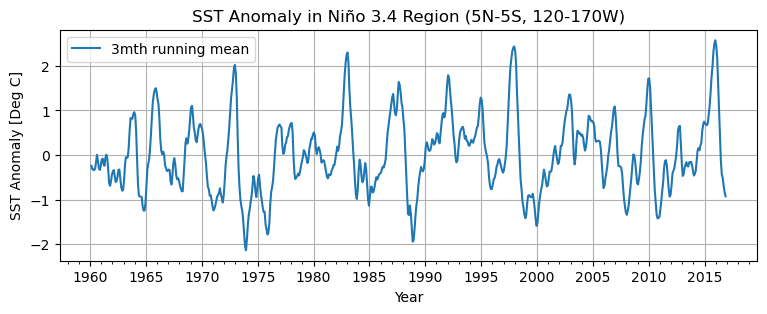

In [6]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(sst_anom.time.data, sst_anom, label='3mth running mean')

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # major_locator: every 5 years
ax.xaxis.set_minor_locator(mdates.YearLocator())  # minor_locator: every year

# Set title, xlabel and ylabel
ax.set(title='SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)', 
       xlabel='Year', 
       ylabel='SST Anomaly [Deg C]')

ax.tick_params(axis='x', rotation=0)

# Add legend to display the label
ax.legend()

# Add grid lines
ax.grid(True)

plt.show()

# ANS. 1.2

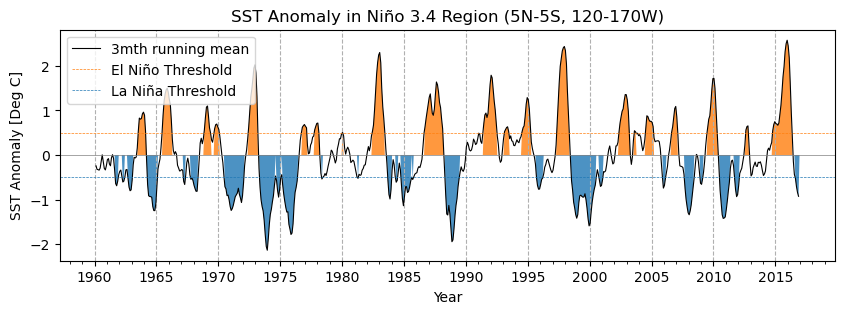

In [7]:
# Identify El Nino and La Nina
El_arr = np.zeros_like(sst_anom)
La_arr = np.zeros_like(sst_anom)

El_arr[sst_anom > 0.5] = sst_anom[sst_anom > 0.5]
La_arr[sst_anom < -0.5] = sst_anom[sst_anom < -0.5]

fig, ax = plt.subplots(figsize=(10, 3))

# Plot anomaly: 3mth running mean
ax.plot(sst_anom.time.data, sst_anom, 'k', label='3mth running mean', lw=0.8)

# Fill El Nino and La Nina
La_fill = ax.fill_between(sst_anom.time.data, La_arr, alpha=0.8)
El_fill = ax.fill_between(sst_anom.time.data, El_arr, alpha=0.8)


# Plot threshold lines
ax.axhline(y=0.5, c='tab:orange', ls='--', lw=0.5, label='El Niño Threshold')
ax.axhline(y=0, c='gray', ls='-', lw=0.5)
ax.axhline(y=-0.5, c='tab:blue', ls='--', lw=0.5, label='La Niña Threshold')

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # major_locator: every 5 years
ax.xaxis.set_minor_locator(mdates.YearLocator())  # minor_locator: every year

# Set title, xlabel and ylabel
ax.set(title='SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)', 
       xlabel='Year', 
       ylabel='SST Anomaly [Deg C]')

# Add legend to display the label
ax.legend()

# Only show x-axis major grid lind
ax.grid(which='major', axis='x', ls='--')

plt.show()

# 2. Earth’s energy budget
In this problem set, you will analyze top-of-atmosphere (TOA) radiation data from [NASA’s CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table). Read [this post](https://www.nasa.gov/feature/langley/what-is-earth-s-energy-budget-five-questions-with-a-guy-who-knows) for more about Earth’s energy budget.
![2.png](https://zhu-group.github.io/ese5023/figs/energy_budget.jpg)
[Figure source](https://www.nasa.gov/feature/langley/what-is-earth-s-energy-budget-five-questions-with-a-guy-who-knows)

Download the data (`CERES_EBAF-TOA_200003-201701.nc`) [here](http://172.18.31.60/index.php/s/CHH6wiN3xCJxQeS). The size of the data file is `702.5 MB`. It will take a minute or two to download. Start by importing `xarray`, `numpy`, and `matplotlib`.

**2.1 [5 points]** Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

**2.2 [10 points]** Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

[Hint: Consider calculating the area of each grid]

**2.3 [5 points]** Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

**2.4 [5 points]** Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as `≤25%` and high cloud area as `≥75%`. Your results should be 2D maps.

**2.5 [5 points]** Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

# ANS. 2.1

In [8]:
TOA = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc', engine="netcdf4")
TOA

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

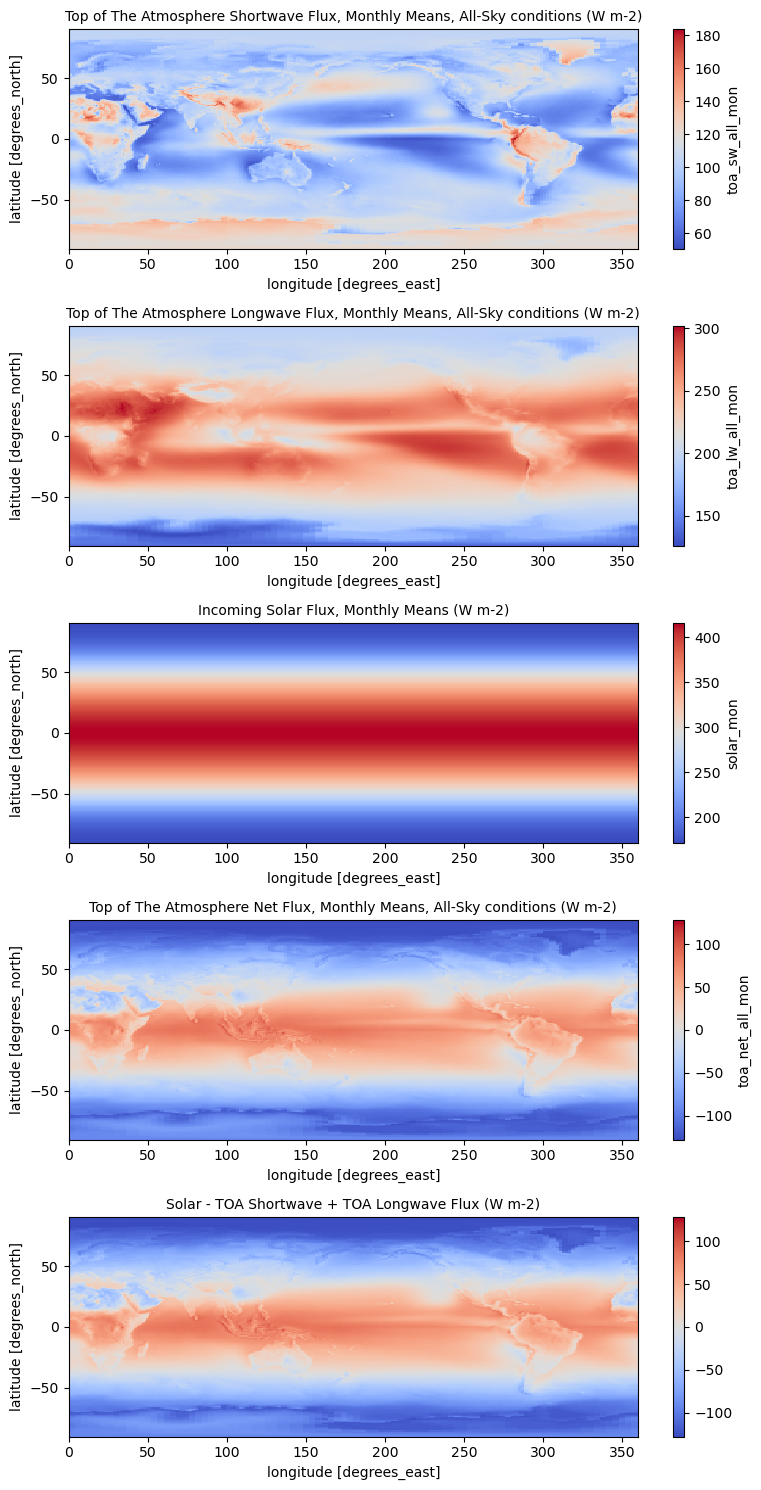

In [9]:
var_list = [TOA['toa_sw_all_mon'], TOA['toa_lw_all_mon'], TOA['solar_mon'], TOA['toa_net_all_mon']]

fig, axs = plt.subplots(5, 1, figsize=(8, 15))

# ax 0,1,2,3
for i, var in enumerate(var_list):
    var_mean = var.mean('time')
    var_mean.plot(ax=axs[i], cmap='coolwarm')
    axs[i].set_title(var.long_name + ' (' + var.units + ')',
                     fontsize=10)

# ax 4: solar_mon - toa_sw_all_mon - toa_lw_all_mon = toa_net_all_mon
solar_sw_lw = (TOA.solar_mon - TOA.toa_sw_all_mon - TOA.toa_lw_all_mon).mean('time')
solar_sw_lw.plot(ax=axs[4], cmap='coolwarm')

axs[4].set_title('Solar - TOA Shortwave + TOA Longwave Flux (W m-2)',
                 fontsize=10)

plt.tight_layout()
plt.show()

# ANS. 2.2

In [10]:
# Calculate latitude weights for each grid point
weights = np.cos(np.deg2rad(TOA.lat))

TOA.weighted(weights).mean()[['toa_lw_all_mon','toa_sw_all_mon','solar_mon']]

<xarray.Dataset>
Dimensions:         ()
Data variables:
    toa_lw_all_mon  float64 240.3
    toa_sw_all_mon  float64 99.14
    solar_mon       float64 340.3

# ANS. 2.3

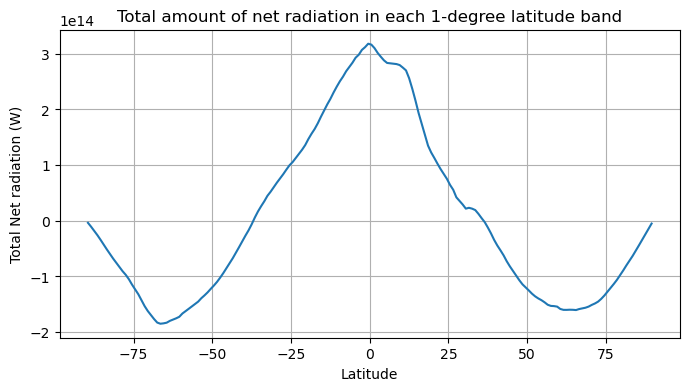

In [11]:
# Calculate  area for each grid point
area = 2 * np.pi * 6371e3**2 * np.abs(np.deg2rad(TOA.lat[1]) - np.deg2rad(TOA.lat[0]))

# Calculate radiation per grid point
radiation_per_grid = TOA.toa_net_all_mon * area

# Compute weighted average total radiation
radiation_total = (radiation_per_grid * weights).mean(dim=['lon', 'time'])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(TOA.lat, radiation_total)

ax.set(title  = 'Total amount of net radiation in each 1-degree latitude band',
       xlabel = 'Latitude',
       ylabel = 'Total Net radiation (W)')

ax.grid(True)

plt.show()

# ANS. 2.4

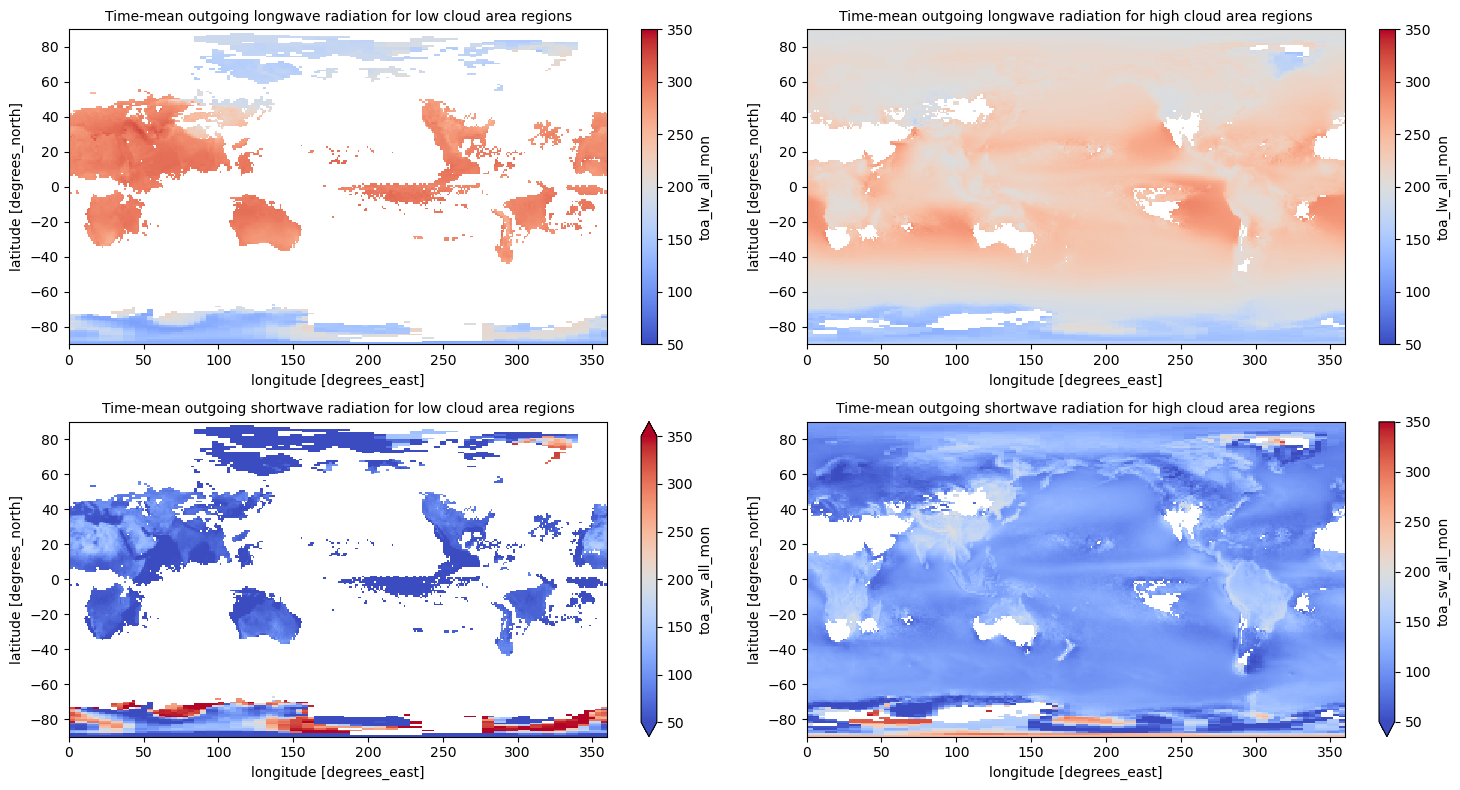

In [10]:
lw_lowc  = TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon <= 25).mean('time')
lw_highc = TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon >= 75).mean('time')
sw_lowc  = TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon <= 25).mean('time')
sw_highc = TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon >= 75).mean('time')

var_list = [lw_lowc, lw_highc, sw_lowc, sw_highc]
title_list = ['Time-mean outgoing longwave radiation for low cloud area regions',
              'Time-mean outgoing longwave radiation for high cloud area regions',
              'Time-mean outgoing shortwave radiation for low cloud area regions',
              'Time-mean outgoing shortwave radiation for high cloud area regions']

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, var in enumerate(var_list):
    # Must add .flatten()
    var.plot(ax=axs.flatten()[i], cmap='coolwarm', vmin=50, vmax=350)
    axs.flatten()[i].set_title(title_list[i],
                     fontsize=10)


plt.tight_layout()
plt.show()

# ANS. 2.5

In [15]:
print_list = ['Global mean values of longwave radiation for low cloud area regions:',
              'Global mean values of longwave radiation for high cloud area regions:',
              'Global mean values of shortwave radiation for low cloud area regions:',
              'Global mean values of shortwave radiation for high cloud area regions:']

for i, var in enumerate(var_list):   
    print(print_list[i], var.weighted(weights).mean(('lat','lon')).values, 'W m-2')

Global mean values of longwave radiation for low cloud area regions: 270.85302660016487 W m-2
Global mean values of longwave radiation for high cloud area regions: 225.70844139699176 W m-2
Global mean values of shortwave radiation for low cloud area regions: 75.4943238685977 W m-2
Global mean values of shortwave radiation for high cloud area regions: 113.157122116768 W m-2


### The overall effect of clouds on shortwave and longwave radiation: 
Outgoing longwave radiation: low cloud area region > high cloud area region

Outgoing shortwave radiation : low cloud area region < high cloud area region

Therefore, clouds `weaken the longwave` radiation and `strenghen the shortwave` radiation.

# 3. Explore a `netCDF` dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) [website](https://disc.gsfc.nasa.gov/). Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in `netCDF` format, and have temporal information.

**3.1 [5 points]** Plot a time series of a certain variable with monthly seasonal cycle removed.

**3.2 [5 points]** Make at least `5` different plots using the dataset.

# ANS. 3.1
Data source: [ERA5 monthly averaged data on pressure levels from 1940 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-monthly-means?tab=overview).

In [29]:
era5 = xr.open_dataset('era5.reanalysis.q.t.500.1000.2013.2022.global.nc', engine='netcdf4')
era5

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 6, time: 120)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 600 700 850 925 1000
  * time       (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2022-12-01
Data variables:
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-20 20:07:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [57]:
# Origin (120 values)
q = era5.q.sel(latitude=24, longitude=113).sum('level')

# Climatology mean (1 value)
q_clim = q.mean()

# Anomalies (120 values)
q_anom = q - q_clim

q_anom

<xarray.DataArray 'q' (time: 120)>
array([-0.02433086, -0.01306991, -0.01001942, -0.0005421 ,  0.01384149,
        0.01829293,  0.01865092,  0.02015617,  0.0111674 , -0.0086216 ,
       -0.01477239, -0.03013543, -0.02951788, -0.02131017, -0.0100747 ,
        0.00146424,  0.0154036 ,  0.02327332,  0.01994719,  0.02028321,
        0.01278833, -0.00792015, -0.00918778, -0.02758564, -0.02522876,
       -0.01805696, -0.00765666, -0.00292486,  0.01808435,  0.02174494,
        0.01996875,  0.01705313,  0.01415948, -0.00155723, -0.00594791,
       -0.01720533, -0.01958142, -0.024592  , -0.01282563,  0.00617604,
        0.01210726,  0.0198123 ,  0.0196441 ,  0.0232545 ,  0.01341097,
        0.00686691, -0.00762293, -0.02139957, -0.01804402, -0.02156385,
       -0.01013312, -0.00133845,  0.0068426 ,  0.02245228,  0.02014676,
        0.01975898,  0.01767971, -0.00201716, -0.0071191 , -0.02616979,
       -0.02083299, -0.02249351, -0.01265547, -0.00120004,  0.01242563,
        0.02035457,  0.02075608,  0.0234976 ,  0.01340626, -0.00623767,
       -0.01083615, -0.01493903, -0.0197465 , -0.01271585, -0.00728456,
        0.00563417,  0.01371484,  0.02238758,  0.02393086,  0.02163319,
        0.0033212 , -0.00371885, -0.01872666, -0.02541775, -0.02106001,
       -0.01700222, -0.00516568, -0.0082895 ,  0.01592626,  0.01992404,
        0.01798239,  0.01988406,  0.01886462, -0.00246337, -0.01280956,
       -0.02458455, -0.02899051, -0.01774956, -0.00791308,  0.00056439,
        0.01567453,  0.02133991,  0.0182106 ,  0.02223662,  0.01567884,
        0.0032369 , -0.01380352, -0.02406228, -0.01966533, -0.02058518,
       -0.00564403, -0.00468145,  0.0100715 ,  0.02268714,  0.01893597,
        0.02060198,  0.00720804, -0.00967516,  0.00069535, -0.0261937 ],
      dtype=float32)
Coordinates:
    longitude  float32 113.0
    latitude   float32 24.0
  * time       (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2022-12-01

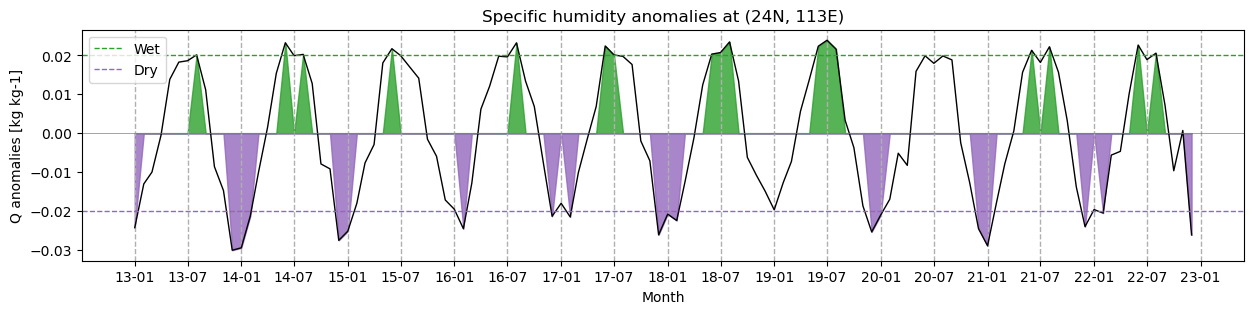

In [59]:
# Identify wet and dry
wet_arr = np.zeros_like(q_anom)
dry_arr = np.zeros_like(q_anom)

wet_arr[q_anom > 0.02] = q_anom[q_anom > 0.02]
dry_arr[q_anom < -0.02] = q_anom[q_anom < -0.02]

fig, ax = plt.subplots(figsize=(15, 3))

# Plot q anomalies
ax.plot(q_anom.time.data, q_anom, 'k', lw=1)

# Fill wet and dry
wet_fill = ax.fill_between(q_anom.time.data, wet_arr, alpha=0.8, color='tab:green')
dry_fill = ax.fill_between(q_anom.time.data, dry_arr, alpha=0.8, color='tab:purple')


# Plot threshold lines
ax.axhline(y=0.02, c='tab:green', ls='--', lw=1, label='Wet')
ax.axhline(y=0, c='gray', ls='-', lw=0.5)
ax.axhline(y=-0.02, c='tab:purple', ls='--', lw=1, label='Dry')

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mdates.MonthLocator((1,7)))  # major_locator: every Jan. and Jul.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))  # Formatting here

# Set title, xlabel and ylabel
ax.set(title='Specific humidity anomalies below 500hPa at (24N, 113E)', 
       xlabel='Month', 
       ylabel='Q anomalies [kg kg-1]')

# Add legend to display the label
ax.legend()

# Only show x-axis major grid lind
ax.grid(which='major', axis='x', ls='--', lw=1)

plt.show()

# ANS. 3.2

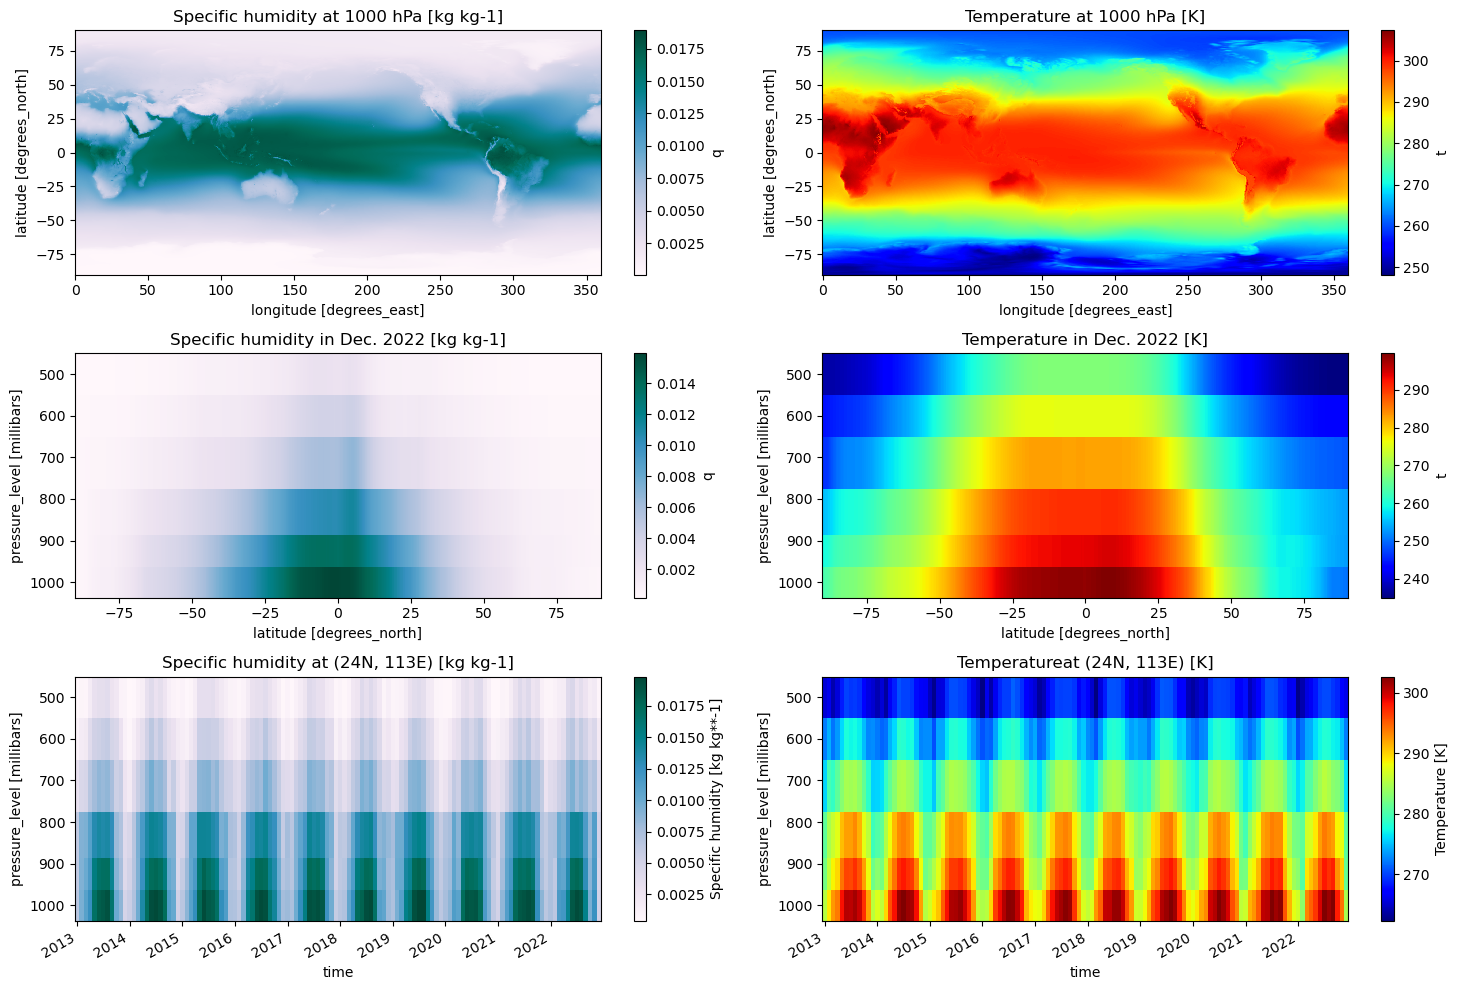

In [91]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(321)
era5.q.sel(level=1000).mean('time').plot(cmap='PuBuGn')
plt.title('Specific humidity at 1000 hPa [kg kg-1]')  

ax2 = fig.add_subplot(322)
era5.t.sel(level=1000).mean('time').plot(cmap='jet')
plt.title('Temperature at 1000 hPa [K]')  

ax3 = fig.add_subplot(323)
era5.q.isel(time=-1).mean('longitude').plot(cmap='PuBuGn')
ax3.invert_yaxis()
plt.title('Specific humidity in Dec. 2022 [kg kg-1]') 

ax4 = fig.add_subplot(324)
era5.t.isel(time=-1).mean('longitude').plot(cmap='jet')
ax4.invert_yaxis()
plt.title('Temperature in Dec. 2022 [K]') 

ax5 = fig.add_subplot(325)
era5.q.sel(latitude=24, longitude=113).plot(cmap='PuBuGn', y='level', x='time')
ax5.invert_yaxis()
plt.title('Specific humidity at (24N, 113E) [kg kg-1]') 

ax6 = fig.add_subplot(326)
era5.t.sel(latitude=24, longitude=113).plot(cmap='jet', y='level', x='time')
ax6.invert_yaxis()
plt.title('Temperatureat (24N, 113E) [K]') 

fig.tight_layout()